In [2]:
%pylab inline
dat1 = np.load('/home/philcox/Save/OVERALL/Hogg_element_predictions_Frischknecht16_net.npz')
dat2 = np.load('/home/philcox/Save/OVERALL/Hogg_element_predictions_chieffi04_net.npz')
dat3 = np.load('/home/philcox/Save/OVERALL/Hogg_element_predictions_Nomoto2013_net.npz')

name_list = ['C04','F16','N13']
shape_list = ['o','s','^']
color_list = ['r','b','k']

data_list = [dat2,dat1,dat3]
means = [dat['mean'] for dat in data_list]
sigmas = [dat['sigma'] for dat in data_list]
elements = dat1['elements']
scores = [dat['scores'] for dat in data_list]

dat1.close()
dat2.close()
dat3.close()

Populating the interactive namespace from numpy and matplotlib


In [3]:
#  Reorder
alpha_names = ['He','C','N','O','F','Ne','Na','Mg','Al','Si','P','S','Cl','Ar','K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn','Ga','Ge']

alphamean,alphasigma = [],[]
for i in range(len(data_list)):
    meanmean = np.mean(means[i],axis=0)
    meansigma = np.mean(sigmas[i],axis=0)
    re_mean,re_sig = [],[]
    for j in range(len(alpha_names)):
        for k in range(len(elements)):
            if alpha_names[j] == elements[k]:
                re_mean.append(meanmean[k])
                re_sig.append(meansigma[k])
    alphamean.append(re_mean)
    alphasigma.append(re_sig)

In [10]:
print(alphamean[1])
print(np.mean(means[1],axis=0))
print(elements)

[-0.046851119492334461, 0.4063481637518816, 0.081364293773122764, 0.49279625730305854, -0.13702732835218961, 0.49652611833181448, 0.70629221635249506, -0.17582902347757007, 0.14444674731314777, -0.097335416988976478, -0.42524365226875444, -0.18846103239715711, -0.72982182032324072, -0.31793202294586059, -0.96263483855029008, -0.40724890725047186, -0.53730306209657841, -0.66785394519249675, -0.24751426751360134, 0.043415871220375012, 0.33190593625669912, 0.11089904876353798, -0.0023688497850053968, 0.28232100671455373, 0.3576649385665629, -0.27687789750520275, 0.079365323925020173, -0.26826492318145584]
[ 0.14444675 -0.31793202  0.40634816 -0.40724891 -0.72982182 -0.00236885
  0.04341587  0.35766494 -0.13702733  0.11089905  0.07936532 -0.26826492
 -0.04685112 -0.96263484 -0.17582902  0.33190594  0.08136429  0.70629222
  0.49652612  0.28232101  0.49279626 -0.42524365 -0.18846103 -0.53730306
 -0.09733542 -0.66785395 -0.24751427 -0.2768779 ]
['Al' 'Ar' 'C' 'Ca' 'Cl' 'Co' 'Cr' 'Cu' 'F' 'Fe'

In [11]:
# Load in proto-solar data
ps_dat = np.load('Chempy/input/stars/Proto-sun_all.npy')
ps_nam = ps_dat.dtype.names
ps_abun = []; ps_err = []
for el in alpha_names:
    for i in range(len(ps_nam)):
        if ps_nam[i] == el:
            ps_abun.append(ps_dat[0][i])
            ps_err.append(ps_dat[1][i])

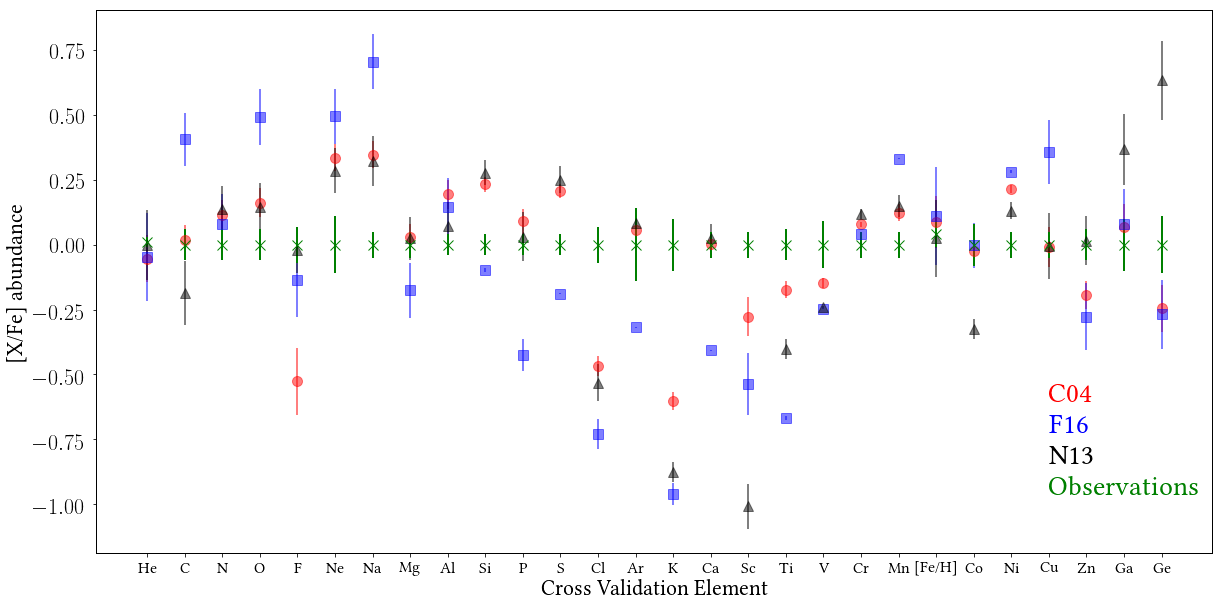

In [16]:
plt.figure(figsize=(20,10))
large_text = 28
text_size = 22
marker_size= 10
small_text = 16
plt.rc('font', family='serif',size = large_text)
plt.rc('xtick', labelsize=small_text)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 2)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
    'font.family' : 'libertine',
    'text.latex.unicode': True,
    }
plt.rcParams.update(params)

# Iterate over trials
for i in range(3):
    plt.errorbar(np.arange(len(alpha_names)),alphamean[i],yerr=alphasigma[i],fmt=shape_list[i],ms=marker_size,c=color_list[i],alpha=0.5,label=name_list[i])
    plt.text(24,-0.6-0.12*i,name_list[i],color=color_list[i])
plt.errorbar(np.arange(len(alpha_names)),ps_abun,yerr=ps_err,fmt='x',ms=marker_size,c='g',label='Observations')
plt.text(24,-0.6-0.12*3,'Observations',color='g')
plt.ylabel('[X/Fe] abundance')
plt.xlabel('Cross Validation Element')
#plt.legend(loc='upper right',)
ax=plt.gca()
#elements = alpha_names.astype("<U6")
for e,el in enumerate(alpha_names):
    if el == 'Fe':
        alpha_names[e] = '[Fe/H]'
la=plt.setp(ax,xticks=np.arange(len(alpha_names)), xticklabels=alpha_names)
plt.savefig('PaperPlots/element_prediction.pdf',dpi=300,bbox_inches='tight')

In [17]:
# Table of scores
print('Yield Set \t LOO-CV Score')
print('---------------------------------')
for i in range(len(data_list)):
    print('%s: \t\t %.1f + %.1f - %.1f' %(name_list[i],np.median(scores[i]),
                                     np.percentile(scores[i],100-15.865)-np.median(scores[i]),
                                     np.median(scores[i])-np.percentile(scores[i],15.865)))

Yield Set 	 LOO-CV Score
---------------------------------
C04: 		 -28.3 + 0.1 - 0.5
F16: 		 -112.9 + 2.0 - 1.0
N13: 		 -56.3 + 1.0 - 0.7


## Rescaling 

In [19]:
from Chempy.parameter import ModelParameters
a = ModelParameters()

# Table of scores
n_el = len(a.initial_neural_names)
print('Yield Set \t Rescaled LOO-CV Score')
print('---------------------------------')
for i in range(len(data_list)):
    print('%s: \t\t %.2f + %.2f - %.2f' %(name_list[i],np.median(scores[i]/n_el),
                                     np.percentile(scores[i]/n_el,100-15.865)-np.median(scores[i]/n_el),
                                     np.median(scores[i]/n_el)-np.percentile(scores[i]/n_el,15.865)))

Yield Set 	 Rescaled LOO-CV Score
---------------------------------
C04: 		 -1.01 + 0.01 - 0.02
F16: 		 -4.03 + 0.07 - 0.04
N13: 		 -2.01 + 0.04 - 0.03
